# Chapter 1 - Bipartite networks

## Souther women network

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from networkx.algorithms import bipartite
from numpy import linalg as LA

In [3]:
# Default value of display.max_rows is 10 i.e. at max 10 rows will be printed.
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', None)

# full array
import sys
np.set_printoptions(threshold=sys.maxsize)
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
# create networks
G = nx.davis_southern_women_graph() 
women = G.graph["top"]
events = G.graph["bottom"]

### Visualization

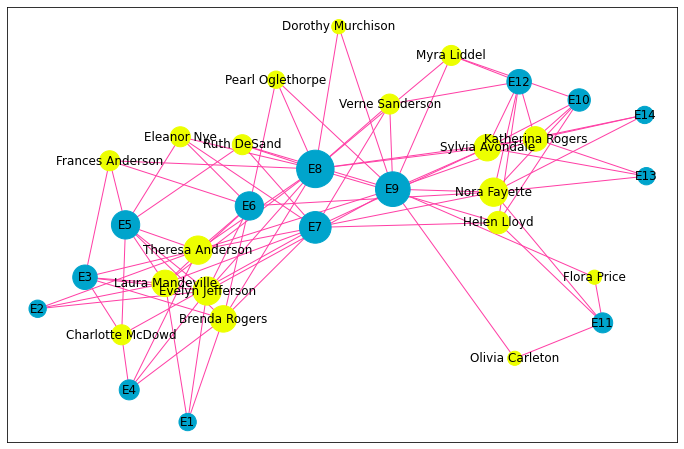

In [5]:
# plot network
X, Y = bipartite.sets(G)

color = bipartite.color(G)
color_dict = {0:'#EDFF00FF',1:'#00A4CCFF'}
color_list = [color_dict[i[1]] for i in G.nodes.data('bipartite')]
size_list =[v * 100 for v in dict(nx.degree(G)).values()]
pos=nx.spring_layout(G)
plt.figure(figsize=(12, 8)) 
nx.draw_networkx(G, pos=pos, node_color=color_list, node_size=size_list, edge_color='#FF3EA5FF')
plt.show()

### Eigenvector Centrality

In [14]:
# Extract biadjacency matrix
W = bipartite.biadjacency_matrix(G, women, events).toarray()
print(W.T)
W.shape

[[1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0]
 [0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0]
 [1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0]
 [1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0]]


(18, 14)

In [15]:
# Matrices
M_0 = np.zeros((18, 18))
print(M_0.shape)
M_0_2 = np.zeros((14, 14))
print(M_0.shape)

S1 = np.append(M_0, W, axis=1)
print(S1.shape)

S2 = np.append(W.T, M_0_2, axis=1)
print(S2.shape)

S = np.append(S1, S2, axis=0)
print(S.shape)

(18, 18)
(18, 18)
(18, 32)
(14, 32)
(32, 32)


In [16]:
# eigenvalues and eigenvectors
w, v = LA.eig(S)

In [21]:
# normalized eigenvector centrality
e_women = abs(v[:,0])[0:18]
e_events = abs(v[:,0])[18:32]

e_women = e_women/np.linalg.norm(e_women)
e_events = e_events/np.linalg.norm(e_events)

In [24]:
# normalized degree centrality
d_event = np.count_nonzero(W, axis = 1)/14
d_woman = np.count_nonzero(W, axis = 0)/18

In [28]:
# eigenvector centrality (not normalized)
nx.eigenvector_centrality(G)

# normalize:
# v = np.array(list(nx.eigenvector_centrality(G).values())[-14:])
# normalized_v = v / np.sqrt(np.sum(v**2))
# normalized_v

{'Brenda Rogers': 0.22132997761985013,
 'Charlotte McDowd': 0.11894468975911868,
 'Dorothy Murchison': 0.09293861503197147,
 'E1': 0.1003691529427341,
 'E10': 0.12049201761650308,
 'E11': 0.06331895428788442,
 'E12': 0.1433982299008923,
 'E13': 0.07985451587221754,
 'E14': 0.07985451587221754,
 'E2': 0.10640565406401607,
 'E3': 0.17879448898670355,
 'E4': 0.12444520652004003,
 'E5': 0.22750051269506902,
 'E6': 0.23166230400784954,
 'E7': 0.27117822447266177,
 'E8': 0.35824435911378705,
 'E9': 0.2683424242623056,
 'Eleanor Nye': 0.16146463160228736,
 'Evelyn Jefferson': 0.23669199956593823,
 'Flora Price': 0.04919374969881626,
 'Frances Anderson': 0.14776178887216465,
 'Helen Lloyd': 0.14189261798243377,
 'Katherina Rogers': 0.1557690878247752,
 'Laura Mandeville': 0.21865425850665984,
 'Myra Liddel': 0.13208020380055688,
 'Nora Fayette': 0.18660813789991867,
 'Olivia Carleton': 0.04919374969881626,
 'Pearl Oglethorpe': 0.12729996701762156,
 'Ruth DeSand': 0.16690522908643124,
 'Sylvia 